<a href="https://colab.research.google.com/github/Ensyllis/Notes-and-Projects/blob/main/Fish_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic Linear Models

- This is a Simple Linear Regression Model which employs the use of the Fish data from Kaggle.com.
- It provides us with data from the 7 most common Fishes caught per annum which lets us create a model which predicts the fishes weight based off diferent factors such as length

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Fish.csv to Fish.csv


- This Section just imports the fish data
  - We double check the data
    - Questions:
      - Are there any Missing Data?
      - Is the Data right-(ish?)
      - Does the Data Make Sense?
      - What are our Columsn and Rows?
    - Then We're done!

In [12]:
data = pd.read_csv('Fish.csv')
print(data)
data.head()

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
data['Weight'].value_counts()

300.0     6
1000.0    5
500.0     5
120.0     5
700.0     5
         ..
60.0      1
55.0      1
800.0     1
306.0     1
19.9      1
Name: Weight, Length: 101, dtype: int64

X_train, y_test
- The next thing we need to do is to tell the computer:
  1. What is the X?:
  2. What is the Y?:
    * For this Section we begin with a single X Dependent Variable explaining a Y Variable 

In [16]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Weight ~ Length1', data=data)
model = model.fit()

In [17]:
model.params

Intercept   -462.375079
Length1       32.792164
dtype: float64

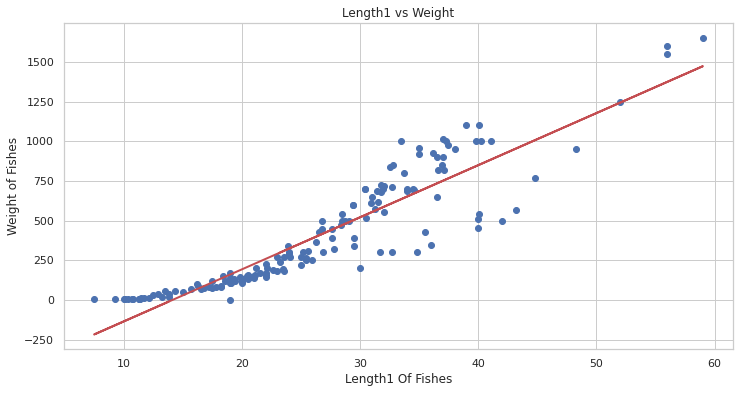

In [20]:
fish_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['Length1'], data['Weight'], 'o')      # scatter plot showing actual data
plt.plot(data['Length1'], fish_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Length1 Of Fishes')
plt.ylabel('Weight of Fishes')
plt.title('Length1 vs Weight')

plt.show()

Great! We've shown that there is a positive relationship between the Length1 of Fishes and the Weight!
- Let's assume that the new Length1 of a Fish is 40, What is the Predicted Weight? Well we can see!

In [22]:
new_X = 40
model.predict({"Length1": new_X})

0    849.311477
dtype: float64

Multiple Linear Regression Model
- In the Last Example we demonstrated the linear regression model through
  - y = α + β1𝚇1
- In this example we demonstrate the multiple linear regression model
  - y = α + β1𝚇1 + β2𝚇2 + β3𝚇3...
  - y = α + Length1×𝚇1 + Length2×𝚇2 + Length3×𝚇3...

In [24]:
#Build linear regression with Length1, Length2, Length3, Heigh and Width as Predictors
#Initialize the X and Y 
predictors = ['Length1', 'Length2','Length3','Height','Width']
X = data[predictors]
y = data['Weight']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [27]:
#Calling the Alphas and Betas
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -499.586955356942
betas = [ 62.35521443  -6.52675249 -29.02621861  28.29735132  22.47330665]


Congrats!
- We found the coefficients!
  - Let's test out some fun Randomly Stimulated X factors

In [39]:
rng = np.random.default_rng(27362)
rints = rng.integers(low=0, high=100, size=5)
rints

array([87, 89, 67, 14, 23])

In [41]:
#Length1, Length2, Length3, Height, Width
new_X = [[87, 89,67,14,23]]
print(model.predict(new_X))

[3312.72805294]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


That's one heavy fish

And we're done!